In [15]:
import os
from pathlib import Path
import numpy as np
import pandas as pd

import PIL
from PIL import UnidentifiedImageError
PIL.ImageFile.LOAD_TRUNCATED_IMAGES = True

import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

# Sources

- https://www.tensorflow.org/tutorials/images/classification

- https://www.kaggle.com/code/o07rohitjj/mammals-classification-with-efficientnet

# Load data

## Loading form kaggle

In [42]:
# !pip install kaggle

To get your kaggle.json

- go to kaggle settings

- press create new token

- add given file to working directory

In [4]:
!cp kaggle.json ~/.kaggle/

In [5]:
!kaggle datasets download -d anirudhg15/mammals-classification

 97% 495M/508M [00:05<00:00, 143MB/s]
100% 508M/508M [00:05<00:00, 102MB/s]


In [7]:
!unzip /content/mammals-classification.zip


## Loading locally

In [43]:
# you can directly go to Prepare data step

# Prepare data

In [12]:
direc = Path('mammals')
filepaths = list(direc.glob(r'**/*.jpg'))
Labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],filepaths))


filepaths = pd.Series(filepaths, name='FilePaths').astype(str)
Labels = pd.Series(Labels, name='Labels').astype(str)


img_df = pd.merge(filepaths, Labels, right_index=True, left_index=True)

img_df = img_df[ img_df['Labels'].apply(lambda x: x[-2:]!='GT') ]

img_df = img_df.sample(frac = 1).reset_index(drop=True)
img_df.head()

,FilePaths,Labels
0,mammals/bear/00000052.jpg,bear
1,mammals/dog/00000080.jpg,dog
2,mammals/bear/00000072.jpg,bear
3,mammals/lion/00000073.jpg,lion
4,mammals/elephant/00000074.jpg,elephant


In [14]:
for img_p in img_df.FilePaths:
    try:
        img = PIL.Image.open(img_p)
    except PIL.UnidentifiedImageError:
            print(img_df.loc[img_df['FilePaths'] == img_p].index)
            img_df = img_df.drop(img_df.loc[img_df['FilePaths'] == img_p].index).reset_index()
            print(img_p)

Int64Index([142], dtype='int64')
mammals/elephant/00000002.jpg


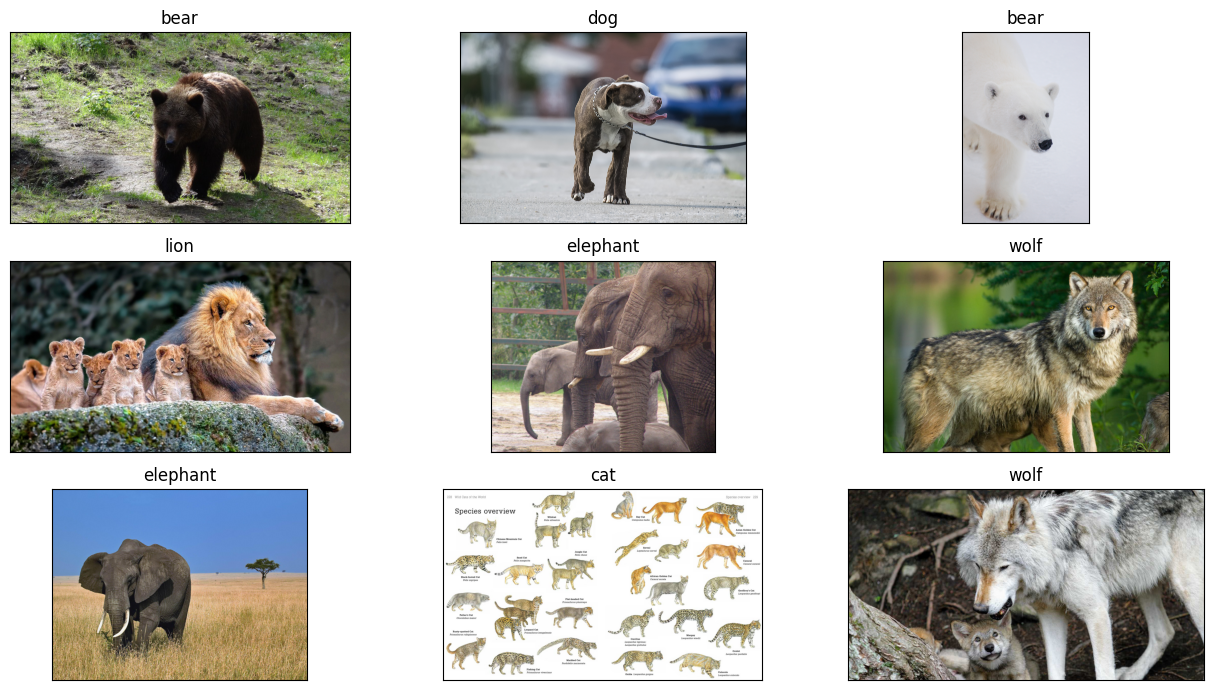

In [16]:
f, a = plt.subplots(nrows=3, ncols=3,figsize=(13, 7),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(a.flat):
    ax.imshow(plt.imread(img_df.FilePaths[i]))
    ax.set_title(img_df.Labels[i])

plt.tight_layout()
plt.show()

For this dataset:

1) you take all dogs, I take all cats

2) you take first half of images of all other animals (except cat and dog), I take the second half

3) we sample other animals image to have 1:1 ratio between dogs (cats) and other animals


In [44]:
def divide_data(img_df, dog_or_cat='dog'):
  if dog_or_cat not in ['dog', 'cat']:
    raise ValueError("Invalid value for dog_or_cat. It should be either 'dog' or 'cat'.")
  main_animal_df = img_df[img_df.Labels==dog_or_cat]
  half = img_df.shape[0] // 2
  if dog_or_cat == 'dog':
    slice_animals = slice(0, half)
  else:
    slice_animals = slice(half, -1)
  all_animals_df = img_df[~img_df.Labels.isin(['dog', 'cat'])].sample(n = main_animal_df.shape[0], random_state=42)[slice_animals]
  df = pd.concat([main_animal_df, all_animals_df]).sample(frac = 1, random_state=42)
  df['y'] = df.Labels == dog_or_cat
  return df

In [45]:
dog_train = divide_data(img_df, dog_or_cat='dog')
print(dog_train.shape)
print(dog_train.Labels.value_counts())
print(dog_train.y.value_counts())

(190, 4)
dog         95
elephant    21
wolf        17
lion        14
bear        12
goat        12
tiger       11
horse        8
Name: Labels, dtype: int64
False    95
True     95
Name: y, dtype: int64


In [46]:
cat_train = divide_data(img_df, dog_or_cat='cat')
print(cat_train.shape)
print(cat_train.Labels.value_counts())
print(cat_train.y.value_counts())

(190, 4)
cat         95
elephant    21
wolf        17
lion        14
bear        12
goat        12
tiger       11
horse        8
Name: Labels, dtype: int64
False    95
True     95
Name: y, dtype: int64


In [ ]:
PIL.Image.open()